In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

# Generate 40 random values
x_train = np.random.uniform(500, 1200, size=400)


In [4]:
#let price be the function of size as 
#price = size*100 + 5000
#y
y_train = []
for  i in x_train:
    y_train.append(i*100 + 5000)

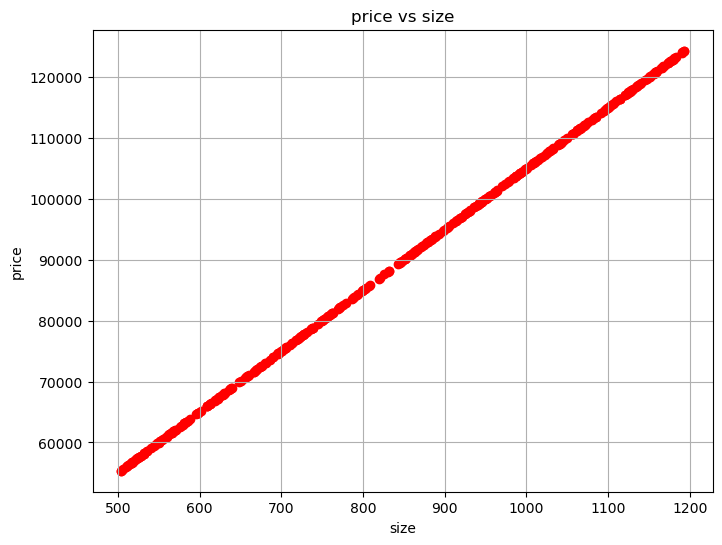

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(x_train,y_train,c='r')
plt.title("price vs size")
plt.xlabel("size")
plt.ylabel("price")
plt.grid(True)
plt.show()

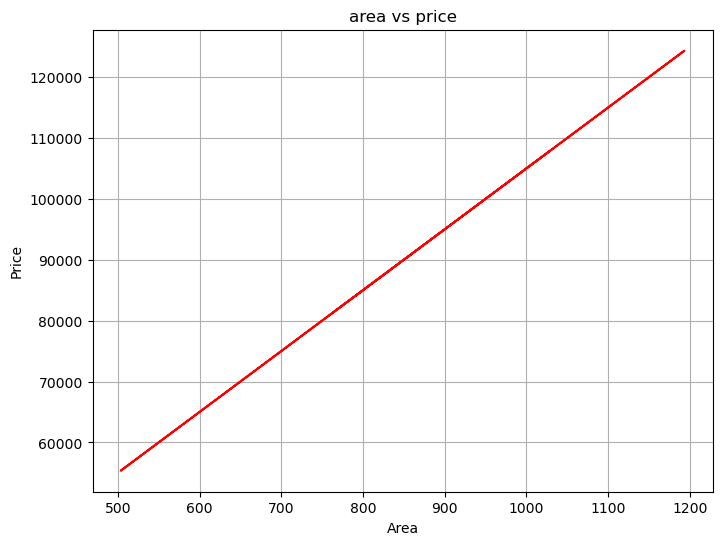

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, c='r')
plt.title('area vs price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Wont be scaling features


Simple fw,b(x) = wx + b


and gradient descent for update - batch gradient descent

In [8]:
'''
WHAT WE WANT TO DO::
Batch Grdient descent

repeat till convergence (loss<1e-8 or iterations>100000): 
{
    w = w - alpha * dJ/dw
    b = b - alpha * dJ/db
} this updation is done after all examples then iter++

WHAT WE NEED::
Gradients
dJ/dw = 1/m * (fw,b(x_i) - y_i)*x_i
dJ/dw = 1/m * (fw,b(x_i) - y_i)

Loss:
keep track of loss:
l = 1/2m * (fw,b(x_i) - y_i)**2
'''

'\nWHAT WE WANT TO DO::\nBatch Grdient descent\n\nrepeat till convergence (loss<1e-8 or iterations>100000): \n{\n    w = w - alpha * dJ/dw\n    b = b - alpha * dJ/db\n} this updation is done after all examples then iter++\n\nWHAT WE NEED::\nGradients\ndJ/dw = 1/m * (fw,b(x_i) - y_i)*x_i\ndJ/dw = 1/m * (fw,b(x_i) - y_i)\n\nLoss:\nkeep track of loss:\nl = 1/2m * (fw,b(x_i) - y_i)**2\n'

In [9]:
def compute_grad(x,y,lr,w,b):
    dJ_dw = 0
    dJ_db = 0
    for i in range(0,len(x)):
        y_pred = w*x[i] + b
        dJ_dw += (y_pred - y[i])*x[i]
        dJ_db += (y_pred - y[i])

    return (dJ_dw/len(x), dJ_db/len(x))

In [10]:
def cost(x,y,w,b):
    loss = 0
    for i in range(0,len(x)):
        loss += ((w*x[i]+b) - y[i])**2
        print(loss)
    return loss/(2*len(x))

In [11]:
def batch_gradient_descent(x,y,w_in,b_in,iterations,lr):
    loss_history = []
    parameters_history = []
    w = w_in
    b = b_in

    for i in range(iterations):
        dJ_dw, dJ_db = compute_grad(x,y,lr,w,b)
        w = w - lr*dJ_dw
        b = b - lr*dJ_dw
        temp_cost = cost(x,y,w,b)
        print(temp_cost)
        loss_history.append(temp_cost)
        parameters_history.append([w,b])
    
    return loss_history, parameters_history, w, b

In [12]:
x_normalized = (x_train - np.mean(x_train)) / np.std(x_train)
y_normalized = (y_train - np.mean(y_train)) / np.std(y_train)

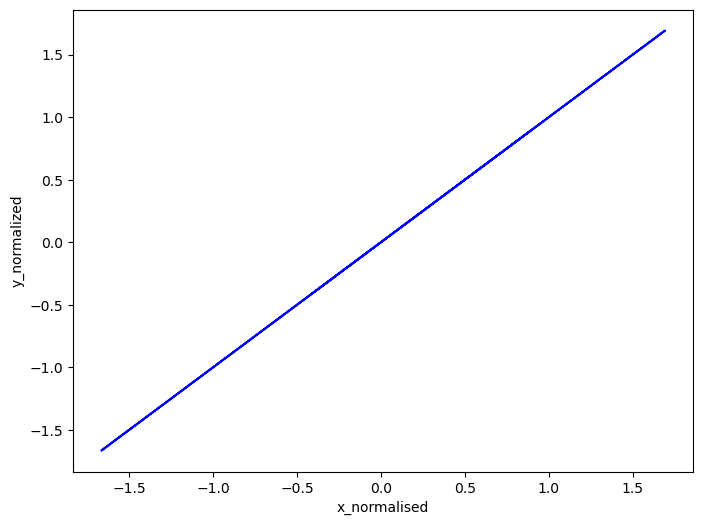

In [13]:
plt.figure(figsize=(8,6))
plt.plot(x_normalized,y_normalized,c='b')
plt.xlabel('x_normalised')
plt.ylabel('y_normalized')
plt.show()

In [ ]:
l_history, p, w_final, b_final = batch_gradient_descent(x_normalized,y_normalized,w_in=10,b_in=10,iterations=3000,lr=0.003)

In [ ]:
l_history

In [16]:
w_final

1.0010957650503458

In [17]:
b_final

1.0010957650503458

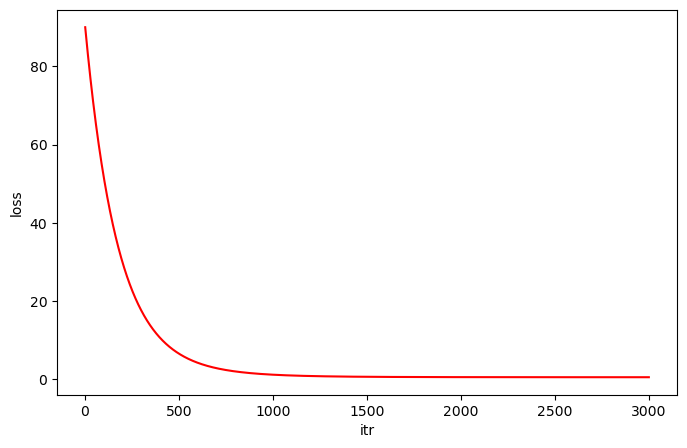

In [18]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(l_history) + 1), l_history,c='r')
plt.xlabel('itr')
plt.ylabel('loss')

plt.show()

In [19]:
predictions = []
for i in range(0,len(x_train)):
    temp_y = w_final*((x_train[i]-np.mean(x_train))/np.std(x_train)) + b_final
    predictions.append(temp_y*np.std(y_train) + np.mean(y_train))

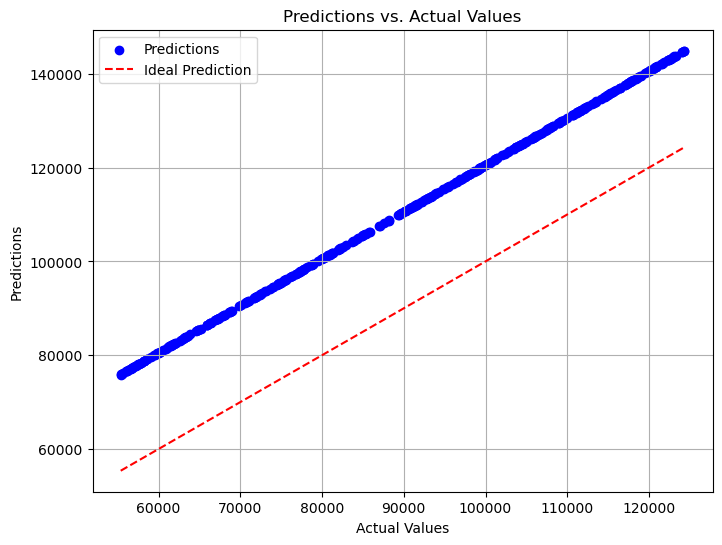

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions, color='blue', label='Predictions')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
def sgd(x,y,w,b,lr,iterations):
    losses = []
    params = []
    m=0
    while m<iterations:
        temp_loss = 0
        for i in range(0,len(x)):
            y_i = w*x[i] + b
            temp_loss+=(y_i - y[i])**2
            dJ_dw = (y_i - y[i])*x[i]
            dJ_db = (y_i - y[i])
            w = w - lr*dJ_dw
            b = b - lr*dJ_db
            params.append([w,b])
        losses.append(temp_loss/len(x))  
        m+=1
        
    return losses, params, w, b

In [33]:
l_history2, p2, w_final2, b_final2 = sgd(x_normalized,y_normalized,w=10,b=10,iterations=3000,lr=0.00001)

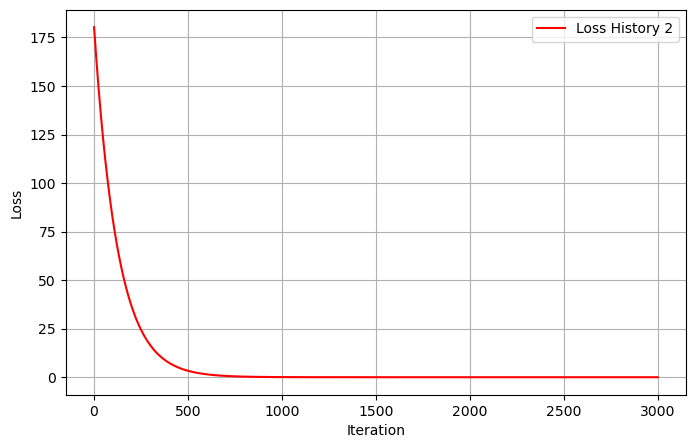

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(l_history2) + 1), l_history2, c='r', label='Loss History 2')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

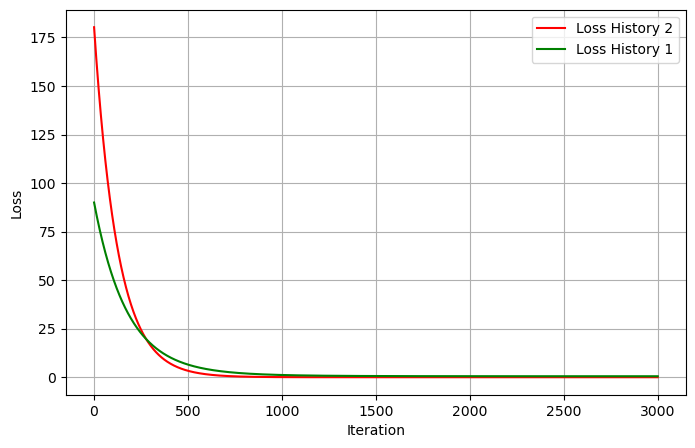

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(l_history2) + 1), l_history2, c='r', label='Loss History 2')
plt.plot(range(1, len(l_history) + 1), l_history, c='g', label='Loss History 1')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()